# Phase 1: Data Loading, Cleaning, Feature Engineering, and EDA

**OULAD Learning Analytics Project**

This notebook implements Phase 1 of the dissertation project:
- Load all 7 OULAD tables
- Perform data cleaning and validation
- Engineer features from demographics, VLE activity, and assessments
- Conduct exploratory data analysis with visualizations
- Save processed dataset for ML modeling

---

## 1. Setup and Imports

In [1]:
import sys
import warnings
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Add src to path for module imports
sys.path.append(str(Path.cwd().parent))

print("Setup complete!")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")

Setup complete!
pandas version: 2.3.3
numpy version: 2.0.1


## 2. Define Data Paths

In [2]:
# Data directories
DATA_DIR = Path('../data')
RAW_DIR = DATA_DIR / 'raw' / 'oulad'
PROCESSED_DIR = DATA_DIR / 'processed' / 'oulad'
FIGURES_DIR = Path('../figures')

# Create directories if they don't exist
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

print(f"Raw data directory: {RAW_DIR}")
print(f"Processed data directory: {PROCESSED_DIR}")
print(f"Figures directory: {FIGURES_DIR}")

Raw data directory: ../data/raw/oulad
Processed data directory: ../data/processed/oulad
Figures directory: ../figures


## 3. Load OULAD Tables

Loading all 7 OULAD tables:
1. **studentInfo**: Demographics and final results
2. **studentRegistration**: Course registration info
3. **studentAssessment**: Student assessment scores
4. **assessments**: Assessment metadata
5. **studentVle**: VLE (Virtual Learning Environment) interaction logs
6. **vle**: VLE activity metadata
7. **courses**: Course metadata

In [3]:
# Load all tables
print("Loading OULAD tables...\n")

students = pd.read_csv(RAW_DIR / 'studentInfo.csv')
print(f"✓ studentInfo: {students.shape}")

registrations = pd.read_csv(RAW_DIR / 'studentRegistration.csv')
print(f"✓ studentRegistration: {registrations.shape}")

student_assessments = pd.read_csv(RAW_DIR / 'studentAssessment.csv')
print(f"✓ studentAssessment: {student_assessments.shape}")

assessments = pd.read_csv(RAW_DIR / 'assessments.csv')
print(f"✓ assessments: {assessments.shape}")

student_vle = pd.read_csv(RAW_DIR / 'studentVle.csv')
print(f"✓ studentVle: {student_vle.shape}")

vle = pd.read_csv(RAW_DIR / 'vle.csv')
print(f"✓ vle: {vle.shape}")

courses = pd.read_csv(RAW_DIR / 'courses.csv')
print(f"✓ courses: {courses.shape}")

print("\n✅ All tables loaded successfully!")

Loading OULAD tables...

✓ studentInfo: (32593, 12)
✓ studentRegistration: (32593, 5)
✓ studentAssessment: (173912, 5)
✓ assessments: (206, 6)
✓ studentVle: (10655280, 6)
✓ vle: (6364, 6)
✓ courses: (22, 3)

✅ All tables loaded successfully!


## 4. Initial Data Exploration

In [4]:
# Student demographics and outcomes
print("=" * 60)
print("STUDENT INFO")
print("=" * 60)
print(students.head())
print("\nColumns:", students.columns.tolist())
print("\nData types:")
print(students.dtypes)
print("\nMissing values:")
print(students.isnull().sum())
print("\nFinal Result Distribution:")
print(students['final_result'].value_counts())
print(f"\nPercentage:")
print(students['final_result'].value_counts(normalize=True) * 100)

STUDENT INFO
  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60          N  

In [5]:
# Assessment information
print("=" * 60)
print("ASSESSMENTS")
print("=" * 60)
print(assessments.head())
print("\nAssessment types:")
print(assessments['assessment_type'].value_counts())
print("\nWeight statistics:")
print(assessments['weight'].describe())

ASSESSMENTS
  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0

Assessment types:
assessment_type
TMA     106
CMA      76
Exam     24
Name: count, dtype: int64

Weight statistics:
count    206.000000
mean      20.873786
std       30.384224
min        0.000000
25%        0.000000
50%       12.500000
75%       24.250000
max      100.000000
Name: weight, dtype: float64


In [6]:
# VLE activity types
print("=" * 60)
print("VLE ACTIVITIES")
print("=" * 60)
print(vle.head())
print("\nActivity types:")
print(vle['activity_type'].value_counts())
print(f"\nTotal unique activities: {len(vle)}")

VLE ACTIVITIES
   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
3   546888         AAA             2013J           url        NaN      NaN
4   547035         AAA             2013J      resource        NaN      NaN

Activity types:
activity_type
resource          2660
subpage           1055
oucontent          996
url                886
forumng            194
quiz               127
page               102
oucollaborate       82
questionnaire       61
ouwiki              49
dataplus            28
externalquiz        26
homepage            22
glossary            21
ouelluminate        21
dualpane            20
repeatactivity       5
htmlactivity         4
sharedsubpage        3
folder               2
Name: count, dtype: int64

Total unique acti

In [7]:
# VLE interaction statistics
print("=" * 60)
print("STUDENT VLE INTERACTIONS")
print("=" * 60)
print(f"Total interactions: {len(student_vle):,}")
print(f"Unique students: {student_vle['id_student'].nunique():,}")
print(f"Unique activities: {student_vle['id_site'].nunique():,}")
print("\nSample data:")
print(student_vle.head())

STUDENT VLE INTERACTIONS
Total interactions: 10,655,280
Unique students: 26,074
Unique activities: 6,268

Sample data:
  code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1


## 5. Data Quality Checks and Cleaning

In [8]:
print("Data Quality Checks\n" + "=" * 60)

# Check for duplicates
print("\n1. Duplicate Check:")
print(f"   studentInfo duplicates: {students.duplicated().sum()}")
print(f"   assessments duplicates: {assessments.duplicated().sum()}")
print(f"   vle duplicates: {vle.duplicated().sum()}")

# Check assessment weights per module
print("\n2. Assessment Weight Validation:")
weight_check = assessments.groupby(['code_module', 'code_presentation'])['weight'].sum()
print("   Weight sums by module/presentation:")
print(weight_check[weight_check != 100].sort_values())
if len(weight_check[weight_check != 100]) > 0:
    print("   ⚠️ WARNING: Some modules have assessment weights != 100")
else:
    print("   ✓ All modules have correct weight sum (100)")

# Check missing values in key columns
print("\n3. Missing Values in Key Tables:")
print("   studentInfo:")
print(students.isnull().sum()[students.isnull().sum() > 0])
print("\n   studentAssessment:")
print(student_assessments.isnull().sum()[student_assessments.isnull().sum() > 0])

Data Quality Checks

1. Duplicate Check:
   studentInfo duplicates: 0
   assessments duplicates: 0
   vle duplicates: 0

2. Assessment Weight Validation:
   Weight sums by module/presentation:
code_module  code_presentation
AAA          2013J                200.0
             2014J                200.0
BBB          2013B                200.0
             2013J                200.0
             2014B                200.0
             2014J                200.0
DDD          2013J                200.0
             2013B                200.0
EEE          2013J                200.0
             2014B                200.0
DDD          2014B                200.0
             2014J                200.0
EEE          2014J                200.0
FFF          2013B                200.0
             2014B                200.0
             2013J                200.0
             2014J                200.0
CCC          2014J                300.0
             2014B                300.0
Name: weight, dt

In [9]:
# Handle missing values in studentAssessment (score)
print("Handling missing assessment scores...")
print(f"Missing scores before: {student_assessments['score'].isnull().sum()}")

# For missing scores, we'll mark them with -1 to indicate "not submitted"
student_assessments['score'] = student_assessments['score'].fillna(-1)

print(f"Missing scores after: {student_assessments['score'].isnull().sum()}")
print("✓ Missing scores replaced with -1 (not submitted)")

Handling missing assessment scores...
Missing scores before: 173
Missing scores after: 0
✓ Missing scores replaced with -1 (not submitted)


## 6. Feature Engineering

Creating features from:
- Demographics (age, gender, region, etc.)
- VLE activity (total clicks, clicks per activity type)
- Assessment performance (average score, submission rate)
- Registration info (unregistration date)

In [10]:
print("Feature Engineering\n" + "=" * 60)

# Start with student demographics
df = students.copy()
print(f"Starting shape: {df.shape}")

# Add unique identifier
df['student_course_id'] = df['code_module'] + '_' + df['code_presentation'] + '_' + df['id_student'].astype(str)

Feature Engineering
Starting shape: (32593, 12)


In [11]:
# Feature 1: VLE Activity Features
print("\n1. Engineering VLE activity features...")

# Merge student_vle with vle to get activity types
vle_with_types = student_vle.merge(vle, on=['id_site', 'code_module', 'code_presentation'], how='left')

# Total clicks per student
total_clicks = vle_with_types.groupby(['code_module', 'code_presentation', 'id_student'])['sum_click'].sum().reset_index()
total_clicks.columns = ['code_module', 'code_presentation', 'id_student', 'total_clicks']

# Clicks by activity type (pivot)
clicks_by_type = vle_with_types.groupby(['code_module', 'code_presentation', 'id_student', 'activity_type'])['sum_click'].sum().unstack(fill_value=0)
clicks_by_type.columns = [f'clicks_{col}' for col in clicks_by_type.columns]
clicks_by_type = clicks_by_type.reset_index()

# Number of unique activities accessed
unique_activities = vle_with_types.groupby(['code_module', 'code_presentation', 'id_student'])['id_site'].nunique().reset_index()
unique_activities.columns = ['code_module', 'code_presentation', 'id_student', 'num_unique_activities']

# Merge VLE features
df = df.merge(total_clicks, on=['code_module', 'code_presentation', 'id_student'], how='left')
df = df.merge(clicks_by_type, on=['code_module', 'code_presentation', 'id_student'], how='left')
df = df.merge(unique_activities, on=['code_module', 'code_presentation', 'id_student'], how='left')

# Fill NaN for students with no VLE activity
vle_cols = ['total_clicks', 'num_unique_activities'] + [c for c in df.columns if c.startswith('clicks_')]
df[vle_cols] = df[vle_cols].fillna(0)

print(f"   Added {len(vle_cols)} VLE features")
print(f"   Shape after VLE features: {df.shape}")


1. Engineering VLE activity features...
   Added 22 VLE features
   Shape after VLE features: (32593, 35)


In [12]:
# Feature 2: Assessment Features
print("\n2. Engineering assessment features...")

# Merge student assessments with assessment metadata
assessments_merged = student_assessments.merge(assessments, on=['id_assessment'], how='left')

# Average assessment score (excluding -1 for not submitted)
avg_score = assessments_merged[assessments_merged['score'] >= 0].groupby(
    ['code_module', 'code_presentation', 'id_student']
)['score'].mean().reset_index()
avg_score.columns = ['code_module', 'code_presentation', 'id_student', 'avg_assessment_score']

# Number of assessments submitted
num_submitted = assessments_merged[assessments_merged['score'] >= 0].groupby(
    ['code_module', 'code_presentation', 'id_student']
).size().reset_index(name='num_assessments_submitted')

# Number of assessments available (per module/presentation)
total_assessments = assessments.groupby(['code_module', 'code_presentation']).size().reset_index(name='total_assessments')

# Submission rate
df = df.merge(avg_score, on=['code_module', 'code_presentation', 'id_student'], how='left')
df = df.merge(num_submitted, on=['code_module', 'code_presentation', 'id_student'], how='left')
df = df.merge(total_assessments, on=['code_module', 'code_presentation'], how='left')

df['num_assessments_submitted'] = df['num_assessments_submitted'].fillna(0)
df['assessment_submission_rate'] = df['num_assessments_submitted'] / df['total_assessments']
df['assessment_submission_rate'] = df['assessment_submission_rate'].fillna(0)

# Scores by assessment type (TMA, CMA, Exam)
for assess_type in ['TMA', 'CMA', 'Exam']:
    type_scores = assessments_merged[
        (assessments_merged['assessment_type'] == assess_type) & (assessments_merged['score'] >= 0)
    ].groupby(['code_module', 'code_presentation', 'id_student'])['score'].mean().reset_index()
    type_scores.columns = ['code_module', 'code_presentation', 'id_student', f'avg_score_{assess_type}']
    df = df.merge(type_scores, on=['code_module', 'code_presentation', 'id_student'], how='left')

print(f"   Added assessment features")
print(f"   Shape after assessment features: {df.shape}")


2. Engineering assessment features...
   Added assessment features
   Shape after assessment features: (32593, 42)


In [13]:
# Feature 3: Registration Features
print("\n3. Engineering registration features...")

# Unregistration date (indicator of early withdrawal)
unreg = registrations[['code_module', 'code_presentation', 'id_student', 'date_unregistration']].copy()
df = df.merge(unreg, on=['code_module', 'code_presentation', 'id_student'], how='left')

# Binary: did student unregister?
df['did_unregister'] = df['date_unregistration'].notna().astype(int)

# Fill missing unregistration date with a large value (e.g., 999)
df['date_unregistration'] = df['date_unregistration'].fillna(999)

print(f"   Added registration features")
print(f"   Shape after registration features: {df.shape}")


3. Engineering registration features...
   Added registration features
   Shape after registration features: (32593, 44)


In [14]:
# Feature 4: Derived Features
print("\n4. Engineering derived features...")

# Clicks per unique activity (engagement intensity)
df['clicks_per_activity'] = df['total_clicks'] / (df['num_unique_activities'] + 1)  # +1 to avoid division by zero

# Binary encoding for categorical variables
df['gender_M'] = (df['gender'] == 'M').astype(int)
df['disability_Y'] = (df['disability'] == 'Y').astype(int)

print(f"   Added derived features")
print(f"   Final shape: {df.shape}")
print(f"\n✅ Feature engineering complete!")
print(f"   Total features: {df.shape[1]}")


4. Engineering derived features...
   Added derived features
   Final shape: (32593, 47)

✅ Feature engineering complete!
   Total features: 47


In [15]:
# Display feature summary
print("\nFeature Categories:")
print(f"  - Demographics: gender, age_band, highest_education, imd_band, region, disability")
print(f"  - VLE Activity: {len([c for c in df.columns if 'clicks' in c])} features")
print(f"  - Assessments: {len([c for c in df.columns if 'assessment' in c or 'score' in c])} features")
print(f"  - Registration: date_unregistration, did_unregister")
print(f"  - Target: final_result")

print("\nAll columns:")
print(df.columns.tolist())


Feature Categories:
  - Demographics: gender, age_band, highest_education, imd_band, region, disability
  - VLE Activity: 22 features
  - Assessments: 7 features
  - Registration: date_unregistration, did_unregister
  - Target: final_result

All columns:
['code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result', 'student_course_id', 'total_clicks', 'clicks_dataplus', 'clicks_dualpane', 'clicks_externalquiz', 'clicks_folder', 'clicks_forumng', 'clicks_glossary', 'clicks_homepage', 'clicks_htmlactivity', 'clicks_oucollaborate', 'clicks_oucontent', 'clicks_ouelluminate', 'clicks_ouwiki', 'clicks_page', 'clicks_questionnaire', 'clicks_quiz', 'clicks_repeatactivity', 'clicks_resource', 'clicks_sharedsubpage', 'clicks_subpage', 'clicks_url', 'num_unique_activities', 'avg_assessment_score', 'num_assessments_submitted', 'total_assessments', 'assessment_submission_r

## 7. Exploratory Data Analysis (EDA)

Visualizing key patterns and relationships

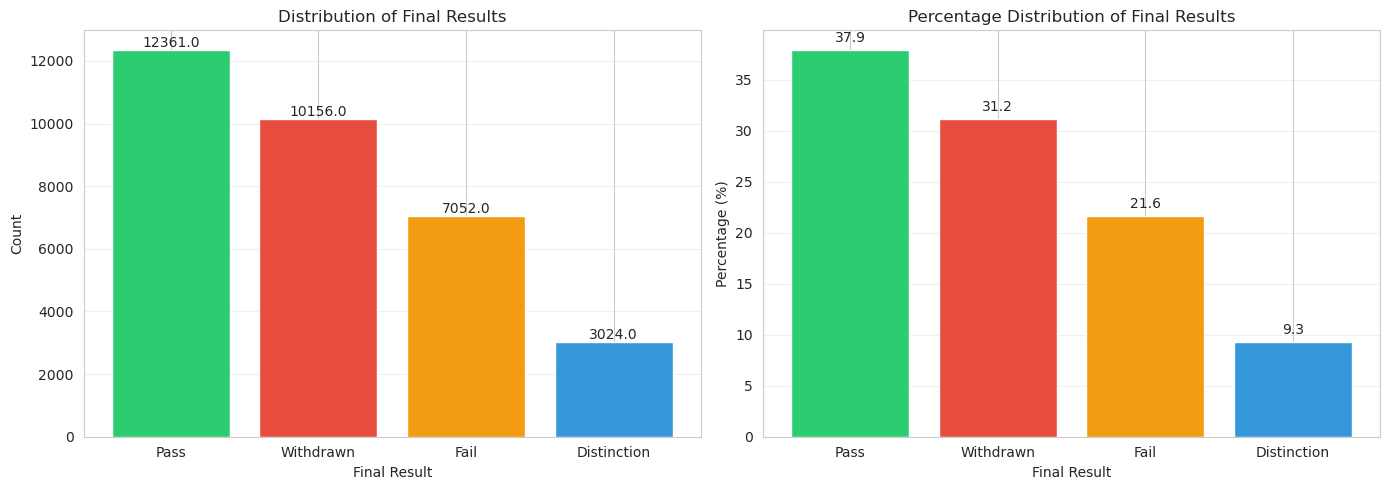

Figure saved: 01_target_distribution.png


In [16]:
# 7.1 Target Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
result_counts = df['final_result'].value_counts()
axes[0].bar(result_counts.index, result_counts.values, color=['#2ecc71', '#e74c3c', '#f39c12', '#3498db'])
axes[0].set_xlabel('Final Result')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Final Results')
axes[0].grid(axis='y', alpha=0.3)

# Percentage plot
result_pct = df['final_result'].value_counts(normalize=True) * 100
axes[1].bar(result_pct.index, result_pct.values, color=['#2ecc71', '#e74c3c', '#f39c12', '#3498db'])
axes[1].set_xlabel('Final Result')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_title('Percentage Distribution of Final Results')
axes[1].grid(axis='y', alpha=0.3)

for ax in axes:
    for i, v in enumerate(ax.patches):
        ax.text(v.get_x() + v.get_width()/2, v.get_height() + 0.5, 
                f'{v.get_height():.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig(FIGURES_DIR / '01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved: 01_target_distribution.png")

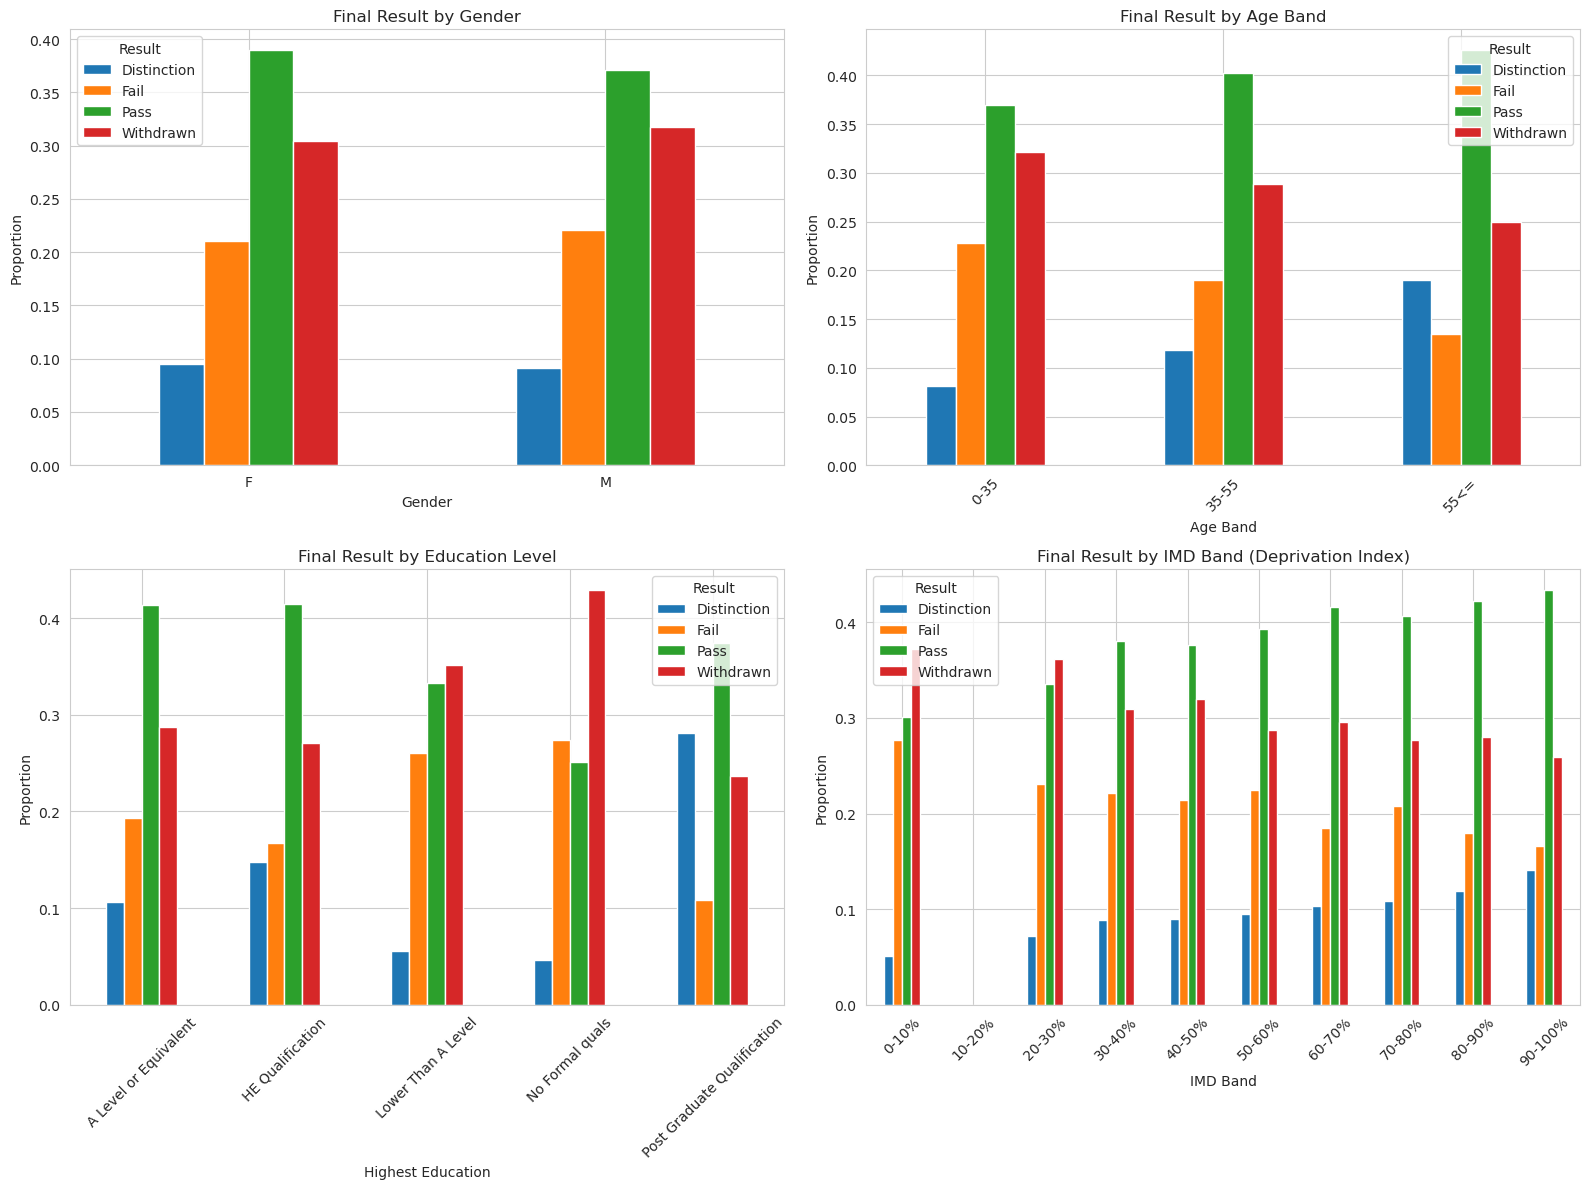

Figure saved: 02_demographics_analysis.png


In [17]:
# 7.2 Demographics Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gender distribution by result
pd.crosstab(df['gender'], df['final_result'], normalize='index').plot(
    kind='bar', ax=axes[0, 0], stacked=False
)
axes[0, 0].set_title('Final Result by Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Proportion')
axes[0, 0].legend(title='Result')
axes[0, 0].tick_params(axis='x', rotation=0)

# Age band distribution by result
pd.crosstab(df['age_band'], df['final_result'], normalize='index').plot(
    kind='bar', ax=axes[0, 1], stacked=False
)
axes[0, 1].set_title('Final Result by Age Band')
axes[0, 1].set_xlabel('Age Band')
axes[0, 1].set_ylabel('Proportion')
axes[0, 1].legend(title='Result')
axes[0, 1].tick_params(axis='x', rotation=45)

# Education level distribution by result
pd.crosstab(df['highest_education'], df['final_result'], normalize='index').plot(
    kind='bar', ax=axes[1, 0], stacked=False
)
axes[1, 0].set_title('Final Result by Education Level')
axes[1, 0].set_xlabel('Highest Education')
axes[1, 0].set_ylabel('Proportion')
axes[1, 0].legend(title='Result')
axes[1, 0].tick_params(axis='x', rotation=45)

# IMD band distribution by result
imd_order = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
df_imd = df[df['imd_band'].isin(imd_order)]
pd.crosstab(df_imd['imd_band'], df_imd['final_result'], normalize='index').reindex(imd_order).plot(
    kind='bar', ax=axes[1, 1], stacked=False
)
axes[1, 1].set_title('Final Result by IMD Band (Deprivation Index)')
axes[1, 1].set_xlabel('IMD Band')
axes[1, 1].set_ylabel('Proportion')
axes[1, 1].legend(title='Result')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(FIGURES_DIR / '02_demographics_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved: 02_demographics_analysis.png")

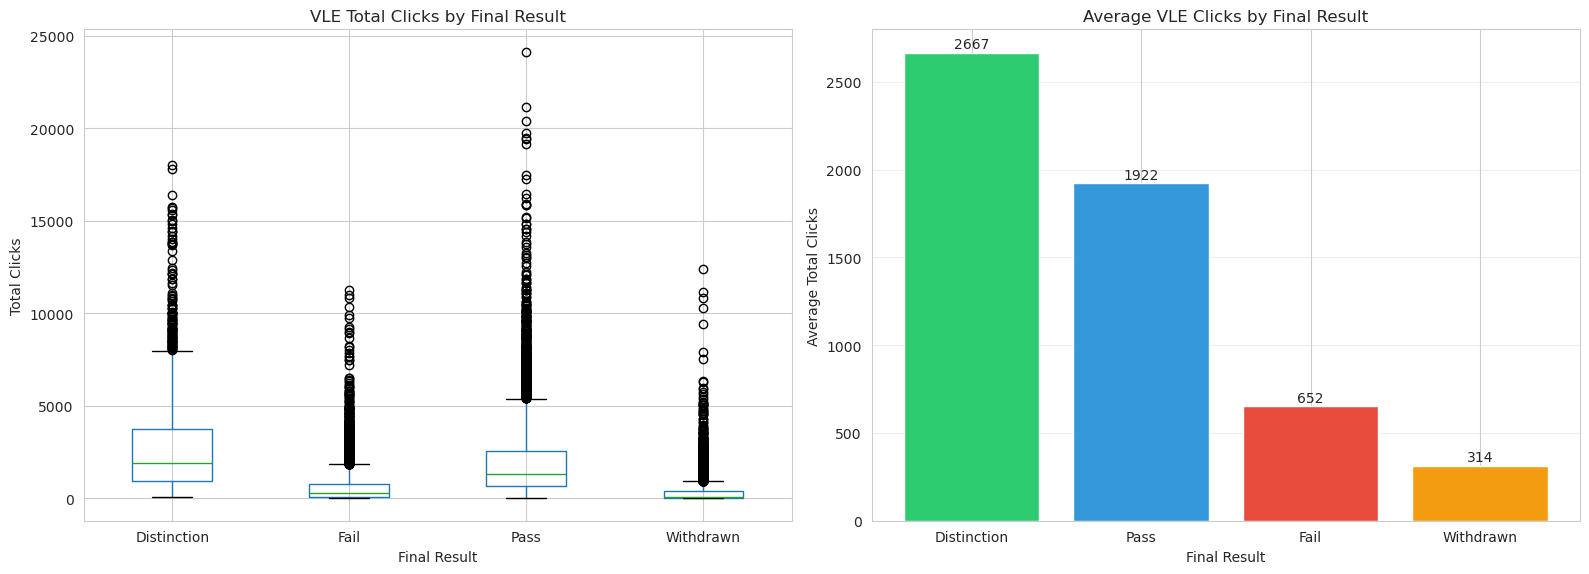

Figure saved: 03_vle_activity_analysis.png


In [18]:
# 7.3 VLE Activity Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Total clicks by result
df.boxplot(column='total_clicks', by='final_result', ax=axes[0])
axes[0].set_title('VLE Total Clicks by Final Result')
axes[0].set_xlabel('Final Result')
axes[0].set_ylabel('Total Clicks')
axes[0].get_figure().suptitle('')  # Remove automatic title

# Average clicks by result (bar plot)
avg_clicks = df.groupby('final_result')['total_clicks'].mean().sort_values(ascending=False)
axes[1].bar(avg_clicks.index, avg_clicks.values, color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
axes[1].set_title('Average VLE Clicks by Final Result')
axes[1].set_xlabel('Final Result')
axes[1].set_ylabel('Average Total Clicks')
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(axes[1].patches):
    axes[1].text(v.get_x() + v.get_width()/2, v.get_height() + 10, 
                 f'{v.get_height():.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig(FIGURES_DIR / '03_vle_activity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved: 03_vle_activity_analysis.png")

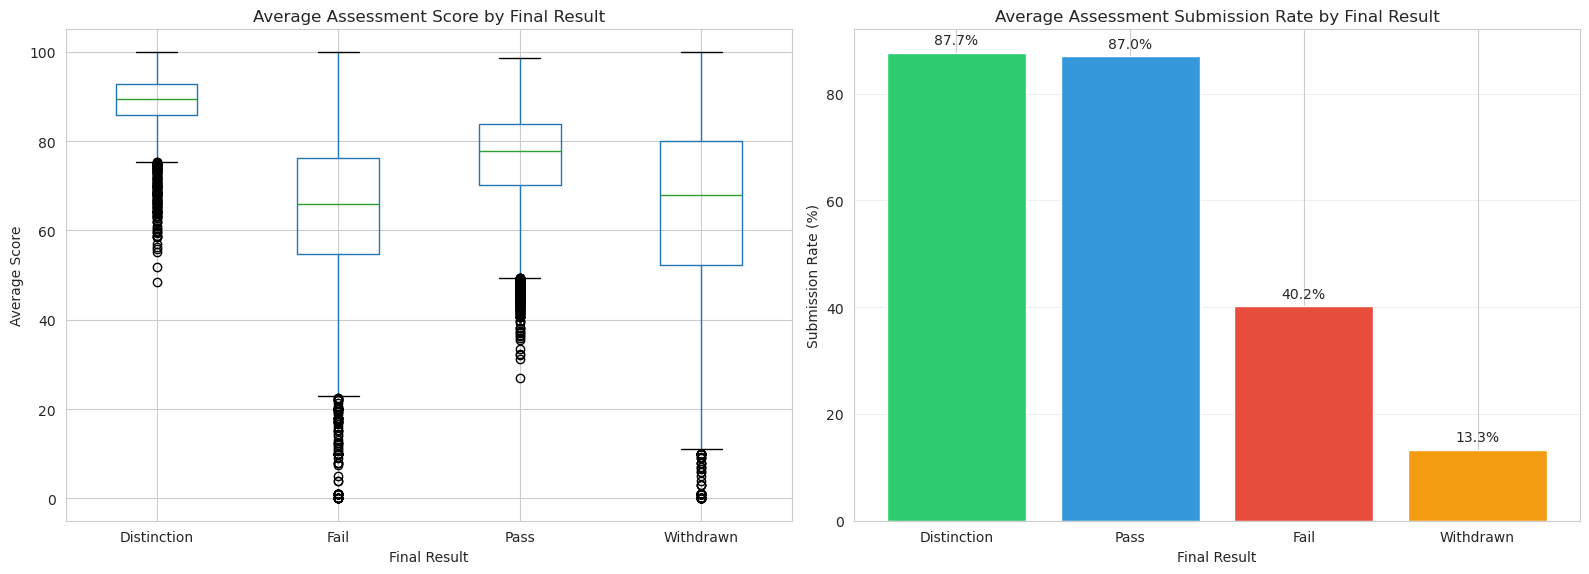

Figure saved: 04_assessment_performance.png


In [19]:
# 7.4 Assessment Performance Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Average assessment score by result
df_with_scores = df[df['avg_assessment_score'].notna()]
df_with_scores.boxplot(column='avg_assessment_score', by='final_result', ax=axes[0])
axes[0].set_title('Average Assessment Score by Final Result')
axes[0].set_xlabel('Final Result')
axes[0].set_ylabel('Average Score')
axes[0].get_figure().suptitle('')

# Submission rate by result
avg_submission = df.groupby('final_result')['assessment_submission_rate'].mean().sort_values(ascending=False)
axes[1].bar(avg_submission.index, avg_submission.values * 100, 
            color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
axes[1].set_title('Average Assessment Submission Rate by Final Result')
axes[1].set_xlabel('Final Result')
axes[1].set_ylabel('Submission Rate (%)')
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(axes[1].patches):
    axes[1].text(v.get_x() + v.get_width()/2, v.get_height() + 1, 
                 f'{v.get_height():.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig(FIGURES_DIR / '04_assessment_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved: 04_assessment_performance.png")

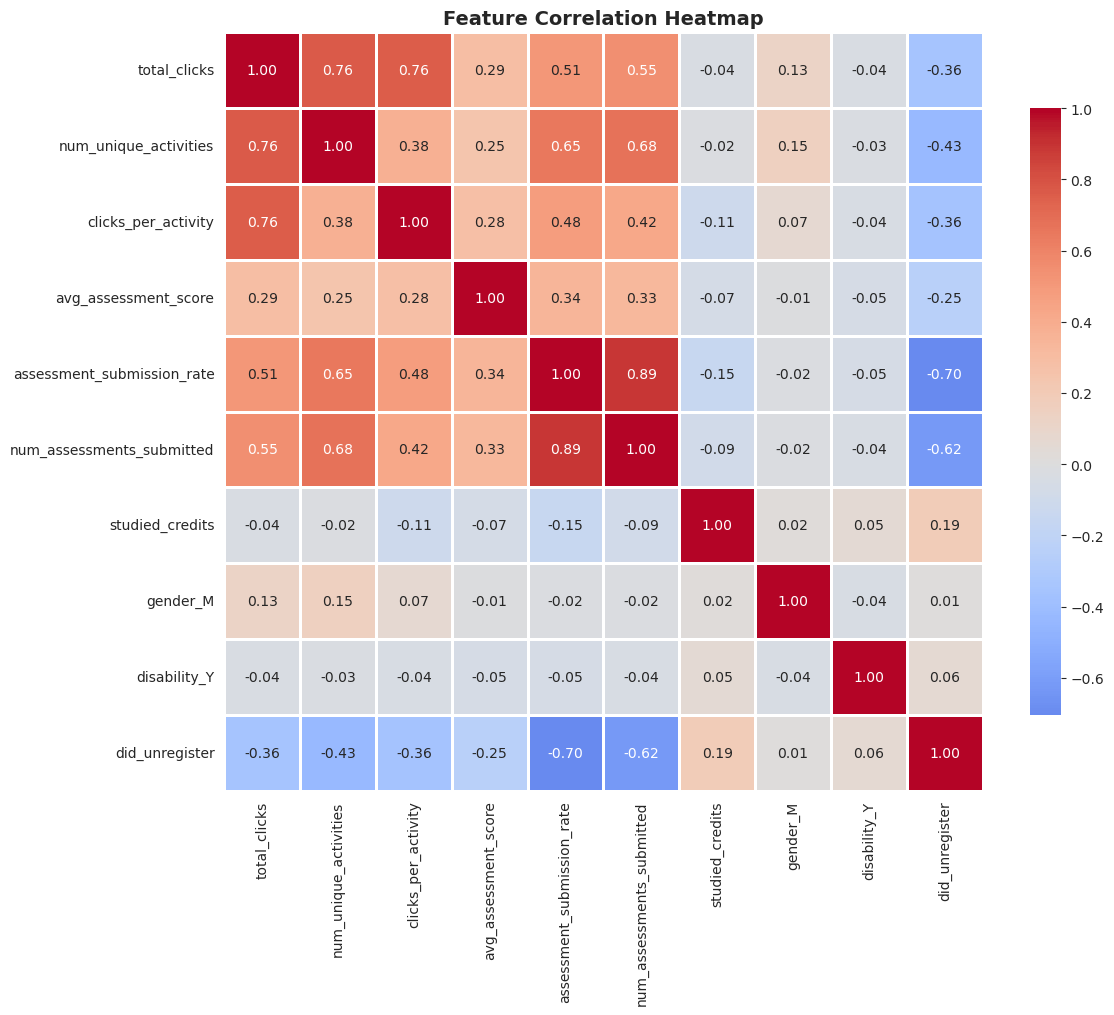

Figure saved: 05_correlation_heatmap.png


In [20]:
# 7.5 Correlation Analysis
# Select numeric features for correlation
numeric_features = [
    'total_clicks', 'num_unique_activities', 'clicks_per_activity',
    'avg_assessment_score', 'assessment_submission_rate',
    'num_assessments_submitted', 'studied_credits',
    'gender_M', 'disability_Y', 'did_unregister'
]

# Filter available columns
available_numeric = [col for col in numeric_features if col in df.columns]

# Compute correlation matrix
corr_matrix = df[available_numeric].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(FIGURES_DIR / '05_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure saved: 05_correlation_heatmap.png")

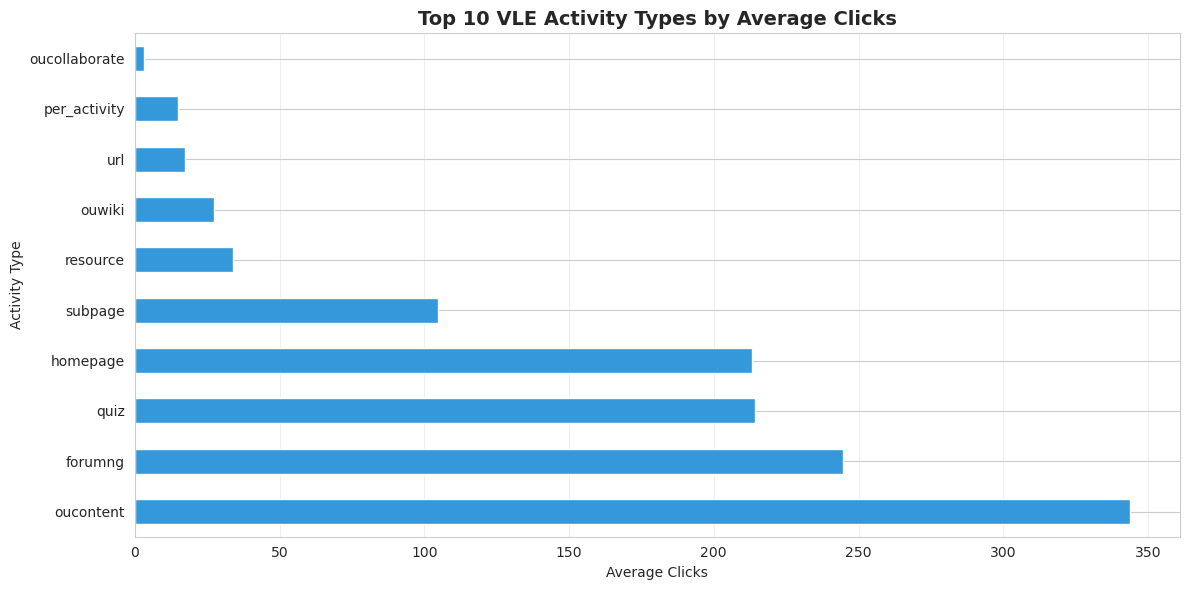

Figure saved: 06_top_vle_activities.png


In [21]:
# 7.6 Top VLE Activity Types Analysis
# Get activity type columns
activity_cols = [c for c in df.columns if c.startswith('clicks_')]

if len(activity_cols) > 0:
    # Calculate average clicks per activity type
    activity_avg = df[activity_cols].mean().sort_values(ascending=False).head(10)
    activity_avg.index = [idx.replace('clicks_', '') for idx in activity_avg.index]
    
    plt.figure(figsize=(12, 6))
    activity_avg.plot(kind='barh', color='#3498db')
    plt.title('Top 10 VLE Activity Types by Average Clicks', fontsize=14, fontweight='bold')
    plt.xlabel('Average Clicks')
    plt.ylabel('Activity Type')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / '06_top_vle_activities.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Figure saved: 06_top_vle_activities.png")
else:
    print("No VLE activity type columns found")

## 8. Data Summary and Statistics

In [22]:
print("=" * 80)
print("FINAL DATASET SUMMARY")
print("=" * 80)

print(f"\nTotal records: {len(df):,}")
print(f"Total features: {df.shape[1]}")
print(f"Unique students: {df['id_student'].nunique():,}")
print(f"Unique courses: {df['code_module'].nunique()}")

print("\nTarget Distribution:")
print(df['final_result'].value_counts())
print("\nPercentage:")
print(df['final_result'].value_counts(normalize=True) * 100)

print("\nMissing Values:")
missing = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
if len(missing) > 0:
    print(missing)
else:
    print("No missing values in final dataset")

print("\nNumeric Features Summary:")
print(df[available_numeric].describe())

FINAL DATASET SUMMARY

Total records: 32,593
Total features: 47
Unique students: 28,785
Unique courses: 7

Target Distribution:
final_result
Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: count, dtype: int64

Percentage:
final_result
Pass           37.925321
Withdrawn      31.160065
Fail           21.636548
Distinction     9.278066
Name: proportion, dtype: float64

Missing Values:
avg_score_Exam          27634
avg_score_CMA           17493
avg_score_TMA            7805
avg_assessment_score     6773
imd_band                 1111
dtype: int64

Numeric Features Summary:
       total_clicks  num_unique_activities  clicks_per_activity  \
count  32593.000000           32593.000000         32593.000000   
mean    1215.141257              60.150830            14.831072   
std     1692.604449              55.898555            14.588676   
min        0.000000               0.000000             0.000000   
25%      142.000000              19.000000      

## 9. Save Processed Dataset

In [23]:
# Save to CSV
output_file = PROCESSED_DIR / 'oulad_processed.csv'
df.to_csv(output_file, index=False)

print(f"✅ Processed dataset saved to: {output_file}")
print(f"   Shape: {df.shape}")
print(f"   File size: {output_file.stat().st_size / (1024**2):.2f} MB")

# Try to save as parquet for faster loading (optional)
try:
    output_parquet = PROCESSED_DIR / 'oulad_processed.parquet'
    df.to_parquet(output_parquet, index=False)
    print(f"\n✅ Also saved as parquet: {output_parquet}")
    print(f"   File size: {output_parquet.stat().st_size / (1024**2):.2f} MB")
except ImportError:
    print("\n⚠️  Parquet format not available (install pyarrow or fastparquet for parquet support)")
except Exception as e:
    print(f"\n⚠️  Could not save as parquet: {e}")

✅ Processed dataset saved to: ../data/processed/oulad/oulad_processed.csv
   Shape: (32593, 47)
   File size: 8.18 MB

✅ Also saved as parquet: ../data/processed/oulad/oulad_processed.parquet
   File size: 1.44 MB


## 10. Summary and Next Steps

In [24]:
print("=" * 80)
print("PHASE 1 COMPLETE")
print("=" * 80)

print("\n✅ Completed Tasks:")
print("   1. Loaded all 7 OULAD tables")
print("   2. Performed data quality checks and cleaning")
print("   3. Engineered features from demographics, VLE, and assessments")
print("   4. Conducted exploratory data analysis")
print("   5. Generated and saved 6 visualization figures")
print("   6. Saved processed dataset for ML modeling")

print("\n📊 Key Findings:")
print("   - Target is imbalanced: Pass (majority), Withdrawn, Fail, Distinction")
print("   - VLE activity strongly correlates with success")
print("   - Assessment submission rate is a critical predictor")
print("   - Demographics (age, education) show patterns with outcomes")

print("\n🔜 Next Steps (Phase 2):")
print("   1. Develop clustering models (K-Means, DBSCAN)")
print("   2. Evaluate with silhouette score and visualize with PCA/t-SNE")
print("   3. Profile and interpret student clusters")
print("   4. Prepare for Phase 3: Prediction models")

print("\n" + "=" * 80)

PHASE 1 COMPLETE

✅ Completed Tasks:
   1. Loaded all 7 OULAD tables
   2. Performed data quality checks and cleaning
   3. Engineered features from demographics, VLE, and assessments
   4. Conducted exploratory data analysis
   5. Generated and saved 6 visualization figures
   6. Saved processed dataset for ML modeling

📊 Key Findings:
   - Target is imbalanced: Pass (majority), Withdrawn, Fail, Distinction
   - VLE activity strongly correlates with success
   - Assessment submission rate is a critical predictor
   - Demographics (age, education) show patterns with outcomes

🔜 Next Steps (Phase 2):
   1. Develop clustering models (K-Means, DBSCAN)
   2. Evaluate with silhouette score and visualize with PCA/t-SNE
   3. Profile and interpret student clusters
   4. Prepare for Phase 3: Prediction models

